<a href="https://colab.research.google.com/github/ajisofyan109/python-data-science/blob/main/prediction%20model%20lung%20cancer%20with%20gaussian%20naive%20bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/dataset/survey lung cancer.csv")
data

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   GENDER                 309 non-null    int64
 1   AGE                    309 non-null    int64
 2   SMOKING                309 non-null    int64
 3   YELLOW_FINGERS         309 non-null    int64
 4   ANXIETY                309 non-null    int64
 5   PEER_PRESSURE          309 non-null    int64
 6   CHRONIC DISEASE        309 non-null    int64
 7   FATIGUE                309 non-null    int64
 8   ALLERGY                309 non-null    int64
 9   WHEEZING               309 non-null    int64
 10  ALCOHOL CONSUMING      309 non-null    int64
 11  COUGHING               309 non-null    int64
 12  SHORTNESS OF BREATH    309 non-null    int64
 13  SWALLOWING DIFFICULTY  309 non-null    int64
 14  CHEST PAIN             309 non-null    int64
 15  LUNG_CANCER            309 non-null    i

In [ ]:
data.replace(" ", inplace = True)

GENDER                   None
AGE                      None
SMOKING                  None
YELLOW_FINGERS           None
ANXIETY                  None
PEER_PRESSURE            None
CHRONIC DISEASE          None
FATIGUE                  None
ALLERGY                  None
WHEEZING                 None
ALCOHOL CONSUMING        None
COUGHING                 None
SHORTNESS OF BREATH      None
SWALLOWING DIFFICULTY    None
CHEST PAIN               None
LUNG_CANCER              None
dtype: object

In [ ]:
data

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


In [ ]:
data["LUNG_CANCER"].value_counts()

YES    270
NO      39
Name: LUNG_CANCER, dtype: int64

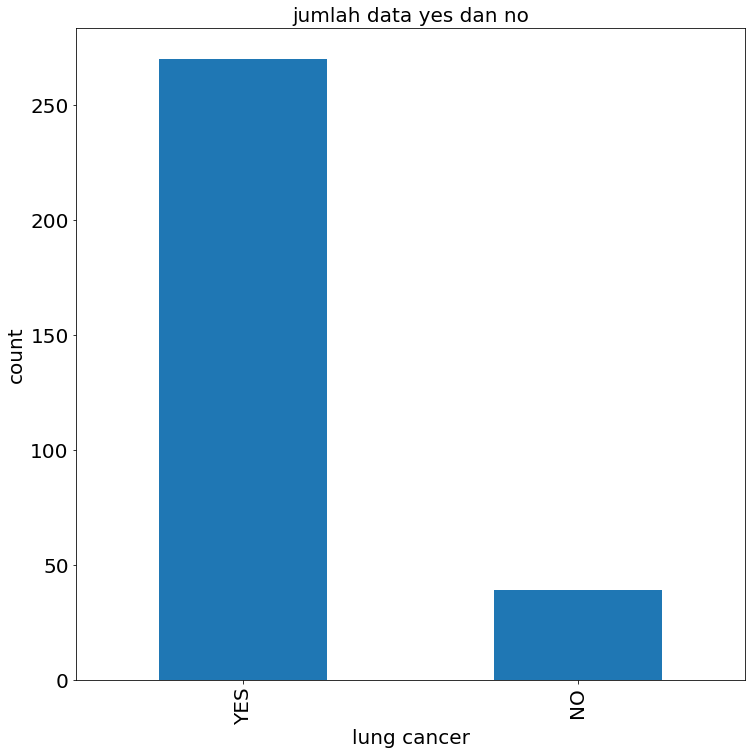

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (12,12))
plt.title("jumlah data yes dan no",fontsize=20)
plt.xlabel("lung cancer", fontsize=20)
plt.ylabel("count",fontsize=20)
data["LUNG_CANCER"].value_counts().plot(kind= 'bar',fontsize=20)
plt.show()

In [ ]:
data['GENDER'] = data['GENDER'].apply(lambda score: 1 if score=='M' else 0)

In [ ]:
data['LUNG_CANCER'] = data['LUNG_CANCER'].apply(lambda score: 1 if score=='YES' else 0)

In [ ]:
data

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,0,56,1,1,1,2,2,2,1,1,2,2,2,2,1,1
305,1,70,2,1,1,1,1,2,2,2,2,2,2,1,2,1
306,1,58,2,1,1,1,1,1,2,2,2,2,1,1,2,1
307,1,67,2,1,2,1,1,2,2,1,2,2,2,1,2,1


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


In [ ]:
data.iloc[15]

GENDER                    0
AGE                      48
SMOKING                   1
YELLOW_FINGERS            2
ANXIETY                   2
PEER_PRESSURE             2
CHRONIC DISEASE           2
FATIGUE                   2
ALLERGY                   2
WHEEZING                  2
ALCOHOL CONSUMING         1
COUGHING                  2
SHORTNESS OF BREATH       2
SWALLOWING DIFFICULTY     2
CHEST PAIN                1
LUNG_CANCER               1
Name: 15, dtype: int64

In [ ]:
x = data.iloc[:, [0,1,2, 3,4,5,6,7,8,9,10,11,12,13,14]].values
y = data["LUNG_CANCER"].values

In [ ]:
x

array([[ 1, 69,  1, ...,  2,  2,  2],
       [ 1, 74,  2, ...,  2,  2,  2],
       [ 0, 59,  1, ...,  2,  1,  2],
       ...,
       [ 1, 58,  2, ...,  1,  1,  2],
       [ 1, 67,  2, ...,  2,  1,  2],
       [ 1, 62,  1, ...,  1,  2,  1]])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y ,test_size=0.2 , random_state=10)

In [ ]:
x_train.shape

(247, 15)

In [ ]:
print(x_train)

[[ 1 64  2 ...  2  1  2]
 [ 0 63  2 ...  2  2  2]
 [ 0 71  2 ...  1  2  2]
 ...
 [ 0 48  1 ...  2  2  1]
 [ 0 53  1 ...  2  1  1]
 [ 0 60  2 ...  2  2  1]]


In [ ]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(x_train, y_train)

GaussianNB()

In [ ]:
model.predict(x_train)

array([1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1])

In [ ]:

GENDER=1
AGE=20
SMOKING =2
YELLOW_FINGERS = 1
ANXIETY = 1
PEER_PRESSURE = 1
CHRONIC_DISEASE = 2
FATIGUE =2
ALLERGY= 2
WHEEZING = 1
ALCOHOL_CONSUMING = 1
COUGHING = 1
SHORTNESS_OF_BREATH = 2
SWALLOWING_DIFFICULTY = 2
CHEST_PAIN =2

model_predik = [[GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE ,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN]]

model_pred =model.predict(model_predik)

if model_pred == 1:
    hasil = "MEMILIKI CIRI-CIRI TERSERANG KANKER PARU-PARU"
elif model_pred == 0 :
    hasil = "TIDAK MEMILIKI CIRI-CIRI TERSERANG KANKER PARU-PARU"
else :
    hasil = "eror"


print("berdasarkan hasil prediksi dengan tingkat akurasi : {0:.4f} ".format(metrics.accuracy_score(y_test, model_predict)),
      "\nmaka dapat dikatakan :" ,hasil)


berdasarkan hasil prediksi dengan tingkat akurasi : 0.8871  
maka dapat dikatakan : MEMILIKI CIRI-CIRI TERSERANG KANKER PARU-PARU


In [ ]:
print("akurasi = " ,accuracy_score(y_test, model.predict(x_test)))

akurasi =  0.8870967741935484


In [ ]:
from sklearn import metrics

model_predict = model.predict(x_test)

print('Akurasi: {0:.4f}'.format(metrics.accuracy_score(y_test, model_predict)))
print(metrics.confusion_matrix(y_test, model_predict, labels=[1,0]))

print('Classification Report:')
print(metrics.classification_report(y_test, model_predict, labels=[1,0]))

Akurasi: 0.8871
[[52  5]
 [ 2  3]]
Classification Report:
              precision    recall  f1-score   support

           1       0.96      0.91      0.94        57
           0       0.38      0.60      0.46         5

    accuracy                           0.89        62
   macro avg       0.67      0.76      0.70        62
weighted avg       0.92      0.89      0.90        62



In [ ]:
GENDER=input("masukan jenis kelamin : ")
AGE=input("masukan umur \t\t: ")
SMOKING =input("masukan umur \t: ")
YELLOW_FINGERS = input("warna jari kekuningan : ")
ANXIETY = input("sering merasa cemas dan depresi : ")
PEER_PRESSURE = input("sering merasa tertekan dengan lingkungan : ")
CHRONIC_DISEASE = input("mempunyai riwayat penyakit kronis : ")
FATIGUE =input("suka merasa kelelahan : ")
ALLERGY= input("mempunyai alergi : ")
WHEEZING = input("suara nafas sangat terdengar saat bernafas : ")
ALCOHOL_CONSUMING = input("mengkomsumsi alkohol : ")
COUGHING = input("suka batuk-batuk : ")
SHORTNESS_OF_BREATH = input("sering sesak nafas : ")
SWALLOWING_DIFFICULTY = input("kesulitan dalam menelan makanan  : ")
CHEST_PAIN =input("merasa nyeri dibagian dada : ")

model_predik = [[GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE ,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN]]

y_pred =model.predict(model_predik)

if y_pred == 1:
    hasil = " mungkin kena kanker paru"
elif y_pred == 0 :
    hasil = "tidak mungkin kena kanker paru"
else :
    hasil = "eror"


print("hasil prediski :" ,hasil)


masukan jenis kelamin : 1
masukan umur 		: 20
masukan umur : 1
warna jari kekuningan : 1
sering merasa cemas dan depresi : 1
sering merasa tertekan dengan lingkungan : 1
mempunyai riwayat penyakit kronis : 1
suka merasa kelelahan : 1
mempunyai alergi : 1
suara nafas sangat terdengar saat bernafas : 1
mengkomsumsi alkohol : 1
suka batuk-batuk : 1
sering sesak nafas : 1
kesulitan dalam menelan makanan  : 1
merasa nyeri dibagian dada : 1
hasil prediski : tidak mungkin kena kanker paru


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:561: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)
